In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 128
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador128 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion_mejorado.csv',
                            canasta='canasta_basica.csv')

recomendador128.CargarModelo(emb_size=128, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.
Modelo Modelos/Modelo_Precios_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.


In [5]:
recomendador128.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion_mejorado.csv', 
                                                  min_ingredientes=5, max_ingredientes=11,
                                                  min_unidades=1, max_unidades=5,
                                                  min_kcal=250, max_kcal= 1500,
                                                  numero_recetas=1
                                                  )

# recomendador128.generar_dataset_entrenamiento_precios(df_precios_profeco='lista_precios_profeco_2022.csv', 
#                                                   numero_recetas=1
#                                                   )                                  

Generando 1  recetas aleatorias...



100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


array([['4 gramos de lentejas, 1 mililitros de carne de cerdo  cruda  degada y grasa separable  entera  hombro  fresco, 1 gramos de pato  crudo  hígado  domesticado, 4 piezas de albóndigas  estilo italiano  congelado, 4 mililitros de pollo crudo, 3 cucharaditas de edamame  sin preparación  congelado, 3 cucharaditas de flan  preparado con leche entera  mezcla seca  natillas de caramelo, 1 piezas de mcdonald\'s  big mac (sin salsa big mac), 1 piezas de moluscos  horneados o asados  concha, 2 tazas de carne de cerdo  migajas  cocidas  96% delgadas / 4% de grasa  molido3 cucharaditas de pan  enriquecido (incluye mezcla de muffins de maíz)  mezcla seca  pan de maíz, 4 onzas de queso  sin sodio agregado  1% de leche con leche  baja grasa  cabaña, 1 cucharaditas de cereales listos listos para comer y orgánicos más copos  el camino de la naturaleza, 2 onzas de uvas, 4 gramos de frijoles refritos  sin grasa  enlatados, 2 piezas de tomillo, 3 onzas de pavo molido crudo, 4 onzas de bebidas  endul

* Entrenar información nutricional


ITERACIÓN: 1
min unidades: 1  max unidades: 11
min kcal: 350  max kcal: 1500
Entrenando desde epoch 0
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/100_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/100_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 100  recetas aleatorias...



100%|██████████| 100/100 [00:01<00:00, 90.82it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:20<00:00,  2.60s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_13 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

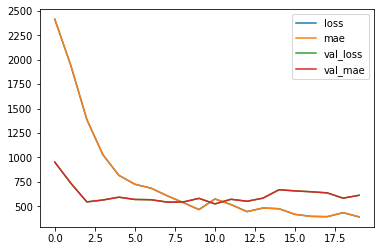

1/1 [==============================] - 0s 219ms/step - loss: 491.5268 - mae: 491.5268
[491.52679443359375, 491.52679443359375]
1/1 [==============================] - 0s 156ms/step
receta 0 kcal_true: 324.0 kcal_pred: 528.9208  precisión: 61.3 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 45.489986  precisión: 59.9 %
receta 0 protein_true: 8.0 protein_pred: 31.742487  precisión: 25.2 %
receta 0 total_fat_true: 0.0 total_fat_pred: 16.53375  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 409.6082  precisión: 93.9 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 35.980156  precisión: 37.5 %
receta 1 protein_true: 8.0 protein_pred: 23.975035  precisión: 33.4 %
receta 1 total_fat_true: 4.0 total_fat_pred: 12.98886  precisión: 30.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 10710.523  precisión: 7.9 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:01<00:00, 89.84it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:25<00:00,  2.65s/it]

datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_14 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                                 
 POOLING_2

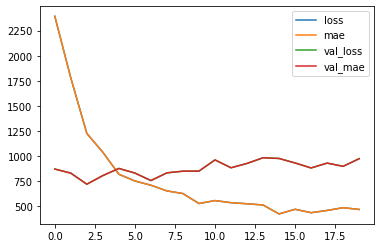

1/1 [==============================] - 0s 215ms/step - loss: 608.9825 - mae: 608.9825
[608.9824829101562, 608.9824829101562]
1/1 [==============================] - 0s 146ms/step
receta 0 kcal_true: 324.0 kcal_pred: 434.8187  precisión: 74.5 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 38.3737  precisión: 50.5 %
receta 0 protein_true: 8.0 protein_pred: 22.81753  precisión: 35.1 %
receta 0 total_fat_true: 0.0 total_fat_pred: 14.060593  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 331.94492  precisión: 76.1 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 30.050247  precisión: 31.3 %
receta 1 protein_true: 8.0 protein_pred: 17.004932  precisión: 47.0 %
receta 1 total_fat_true: 4.0 total_fat_pred: 10.88697  precisión: 36.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 13236.966  precisión: 6.4 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:00<00:00, 104.57it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:22<00:00,  2.63s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_15 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

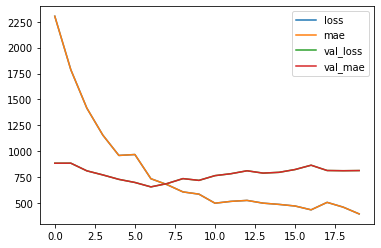

1/1 [==============================] - 0s 224ms/step - loss: 412.1624 - mae: 412.1624
[412.162353515625, 412.162353515625]
1/1 [==============================] - 0s 166ms/step
receta 0 kcal_true: 324.0 kcal_pred: 580.86755  precisión: 55.8 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 56.32407  precisión: 74.1 %
receta 0 protein_true: 8.0 protein_pred: 33.333492  precisión: 24.0 %
receta 0 total_fat_true: 0.0 total_fat_pred: 18.704224  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 435.43277  precisión: 99.9 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 42.7644  precisión: 44.5 %
receta 1 protein_true: 8.0 protein_pred: 24.291004  precisión: 32.9 %
receta 1 total_fat_true: 4.0 total_fat_pred: 14.194075  precisión: 28.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 8887.255  precisión: 9.5 %
receta 2 carbohydrate_true: 72

100%|██████████| 100/100 [00:01<00:00, 85.72it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:33<00:00,  2.74s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_16 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

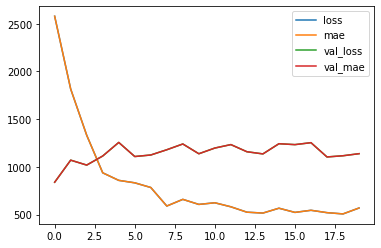

1/1 [==============================] - 0s 217ms/step - loss: 597.5469 - mae: 597.5469
[597.5469360351562, 597.5469360351562]
1/1 [==============================] - 0s 154ms/step
receta 0 kcal_true: 324.0 kcal_pred: 731.666  precisión: 44.3 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 65.54984  precisión: 86.2 %
receta 0 protein_true: 8.0 protein_pred: 38.62519  precisión: 20.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 24.324747  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 557.233  precisión: 78.2 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 50.456074  precisión: 52.6 %
receta 1 protein_true: 8.0 protein_pred: 29.389862  precisión: 27.2 %
receta 1 total_fat_true: 4.0 total_fat_pred: 18.32115  precisión: 21.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 10571.144  precisión: 8.0 %
receta 2 carbohydrate_true: 72.

100%|██████████| 100/100 [00:01<00:00, 93.53it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:23<00:00,  2.63s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_17 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

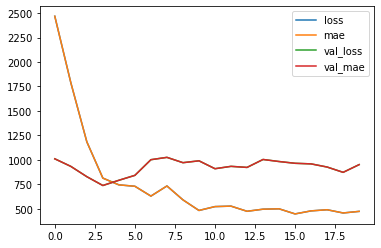

1/1 [==============================] - 0s 248ms/step - loss: 506.5579 - mae: 506.5579
[506.557861328125, 506.557861328125]
1/1 [==============================] - 0s 302ms/step
receta 0 kcal_true: 324.0 kcal_pred: 750.01746  precisión: 43.2 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 71.45153  precisión: 94.0 %
receta 0 protein_true: 8.0 protein_pred: 39.450336  precisión: 20.3 %
receta 0 total_fat_true: 0.0 total_fat_pred: 26.221556  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 547.66223  precisión: 79.6 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 52.6049  precisión: 54.8 %
receta 1 protein_true: 8.0 protein_pred: 28.73491  precisión: 27.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 18.923788  precisión: 21.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 10212.572  precisión: 8.3 %
receta 2 carbohydrate_true: 72

100%|██████████| 100/100 [00:01<00:00, 88.26it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:23<00:00,  2.63s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_18 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

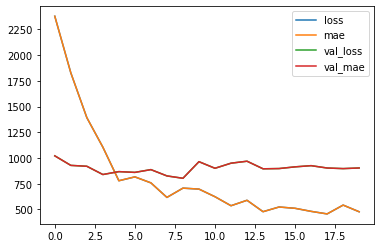

1/1 [==============================] - 0s 207ms/step - loss: 746.5275 - mae: 746.5275
[746.5274658203125, 746.5274658203125]
1/1 [==============================] - 0s 160ms/step
receta 0 kcal_true: 324.0 kcal_pred: 654.68463  precisión: 49.5 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 64.48591  precisión: 84.8 %
receta 0 protein_true: 8.0 protein_pred: 29.795609  precisión: 26.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 20.968365  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 342.83054  precisión: 78.6 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 34.20413  precisión: 35.6 %
receta 1 protein_true: 8.0 protein_pred: 16.059435  precisión: 49.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 11.250572  precisión: 35.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 11688.835  precisión: 7.2 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:01<00:00, 93.27it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:31<00:00,  2.71s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_19 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

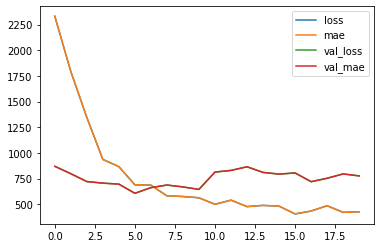

1/1 [==============================] - 0s 233ms/step - loss: 714.5704 - mae: 714.5704
[714.5703735351562, 714.5703735351562]
1/1 [==============================] - 0s 155ms/step
receta 0 kcal_true: 324.0 kcal_pred: 589.37915  precisión: 55.0 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 56.395355  precisión: 74.2 %
receta 0 protein_true: 8.0 protein_pred: 28.280706  precisión: 28.3 %
receta 0 total_fat_true: 0.0 total_fat_pred: 22.316017  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 536.53455  precisión: 81.3 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 51.362415  precisión: 53.5 %
receta 1 protein_true: 8.0 protein_pred: 25.549526  precisión: 31.3 %
receta 1 total_fat_true: 4.0 total_fat_pred: 20.769041  precisión: 19.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15770.577  precisión: 5.4 %
receta 2 carbohydrate_tr

100%|██████████| 100/100 [00:01<00:00, 87.65it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:35<00:00,  2.75s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_20 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

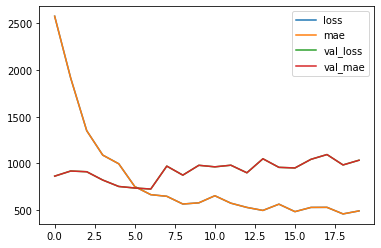

1/1 [==============================] - 0s 280ms/step - loss: 854.9431 - mae: 854.9431
[854.9430541992188, 854.9430541992188]
1/1 [==============================] - 0s 153ms/step
receta 0 kcal_true: 324.0 kcal_pred: 285.66  precisión: 88.2 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 26.255903  precisión: 34.5 %
receta 0 protein_true: 8.0 protein_pred: 15.774027  precisión: 50.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 9.37998  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 234.77844  precisión: 53.8 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 21.468243  precisión: 22.4 %
receta 1 protein_true: 8.0 protein_pred: 13.019764  precisión: 61.4 %
receta 1 total_fat_true: 4.0 total_fat_pred: 8.090906  precisión: 49.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 18579.04  precisión: 4.6 %
receta 2 carbohydrate_true: 72.

100%|██████████| 100/100 [00:01<00:00, 84.47it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:47<00:00,  2.87s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_21 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

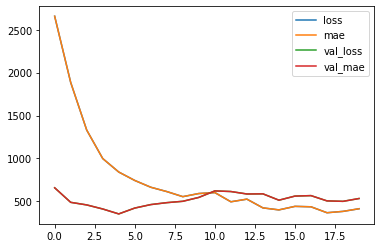

1/1 [==============================] - 0s 213ms/step - loss: 773.2128 - mae: 773.2128
[773.2128295898438, 773.2128295898438]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 324.0 kcal_pred: 839.6236  precisión: 38.6 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 77.77898  precisión: 97.7 %
receta 0 protein_true: 8.0 protein_pred: 50.500584  precisión: 15.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 29.272348  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 823.3042  precisión: 53.0 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 75.71009  precisión: 78.9 %
receta 1 protein_true: 8.0 protein_pred: 49.694324  precisión: 16.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 29.215235  precisión: 13.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 16658.734  precisión: 5.1 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:01<00:00, 81.32it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:26<00:00,  2.66s/it]

datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_22 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                                 
 POOLING_2

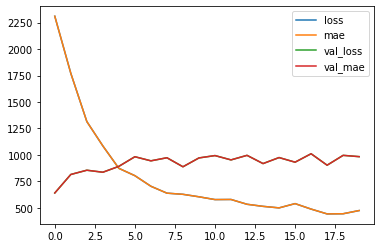

1/1 [==============================] - 0s 236ms/step - loss: 894.2897 - mae: 894.2897
[894.2897338867188, 894.2897338867188]
1/1 [==============================] - 0s 185ms/step
receta 0 kcal_true: 324.0 kcal_pred: 493.56223  precisión: 65.6 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 44.46529  precisión: 58.5 %
receta 0 protein_true: 8.0 protein_pred: 34.677635  precisión: 23.1 %
receta 0 total_fat_true: 0.0 total_fat_pred: 14.964933  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 401.97766  precisión: 92.2 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 36.051075  precisión: 37.6 %
receta 1 protein_true: 8.0 protein_pred: 28.6136  precisión: 28.0 %
receta 1 total_fat_true: 4.0 total_fat_pred: 12.4956  precisión: 32.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 20032.162  precisión: 4.2 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:00<00:00, 104.73it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:43<00:00,  2.83s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_23 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

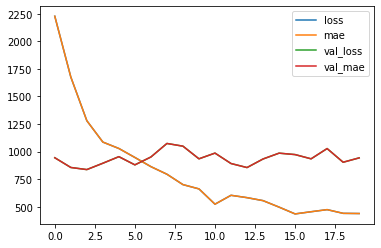

1/1 [==============================] - 0s 215ms/step - loss: 792.2933 - mae: 792.2933
[792.2933349609375, 792.2933349609375]
1/1 [==============================] - 0s 147ms/step
receta 0 kcal_true: 324.0 kcal_pred: 561.9395  precisión: 57.7 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 56.80966  precisión: 74.7 %
receta 0 protein_true: 8.0 protein_pred: 31.327671  precisión: 25.5 %
receta 0 total_fat_true: 0.0 total_fat_pred: 16.024696  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 462.70993  precisión: 94.2 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 46.622726  precisión: 48.6 %
receta 1 protein_true: 8.0 protein_pred: 26.205803  precisión: 30.5 %
receta 1 total_fat_true: 4.0 total_fat_pred: 13.432292  precisión: 29.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 17680.719  precisión: 4.8 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:01<00:00, 84.47it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:41<00:00,  2.82s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_24 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

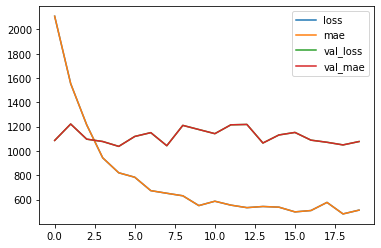

1/1 [==============================] - 0s 212ms/step - loss: 782.0326 - mae: 782.0326
[782.0325927734375, 782.0325927734375]
1/1 [==============================] - 0s 150ms/step
receta 0 kcal_true: 324.0 kcal_pred: 405.1849  precisión: 80.0 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 38.437576  precisión: 50.6 %
receta 0 protein_true: 8.0 protein_pred: 21.529793  precisión: 37.2 %
receta 0 total_fat_true: 0.0 total_fat_pred: 12.685627  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 342.1216  precisión: 78.5 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 32.10197  precisión: 33.4 %
receta 1 protein_true: 8.0 protein_pred: 18.45341  precisión: 43.4 %
receta 1 total_fat_true: 4.0 total_fat_pred: 11.055156  precisión: 36.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 16445.03  precisión: 5.1 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:01<00:00, 97.63it/s] 


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:17<00:00,  2.57s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_25 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

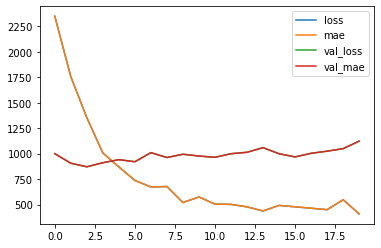

1/1 [==============================] - 0s 200ms/step - loss: 524.9127 - mae: 524.9127
[524.9126586914062, 524.9126586914062]
1/1 [==============================] - 0s 162ms/step
receta 0 kcal_true: 324.0 kcal_pred: 668.97235  precisión: 48.4 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 63.932896  precisión: 84.1 %
receta 0 protein_true: 8.0 protein_pred: 34.035866  precisión: 23.5 %
receta 0 total_fat_true: 0.0 total_fat_pred: 15.553989  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 561.27423  precisión: 77.7 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 53.36261  precisión: 55.6 %
receta 1 protein_true: 8.0 protein_pred: 28.59745  precisión: 28.0 %
receta 1 total_fat_true: 4.0 total_fat_pred: 13.529873  precisión: 29.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 11352.879  precisión: 7.5 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:00<00:00, 102.64it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:21<00:00,  2.61s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_26 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

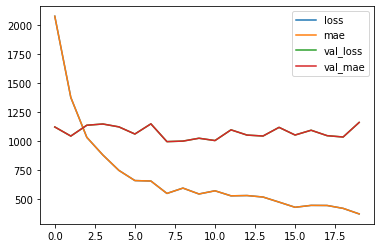

1/1 [==============================] - 0s 246ms/step - loss: 548.7219 - mae: 548.7219
[548.7218627929688, 548.7218627929688]
1/1 [==============================] - 0s 153ms/step
receta 0 kcal_true: 324.0 kcal_pred: 643.1559  precisión: 50.4 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 68.832756  precisión: 90.6 %
receta 0 protein_true: 8.0 protein_pred: 31.913612  precisión: 25.1 %
receta 0 total_fat_true: 0.0 total_fat_pred: 13.023748  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 444.46152  precisión: 98.1 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 47.63517  precisión: 49.6 %
receta 1 protein_true: 8.0 protein_pred: 22.17389  precisión: 36.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 9.331778  precisión: 42.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 11756.49  precisión: 7.2 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:00<00:00, 100.67it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:21<00:00,  2.61s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_27 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

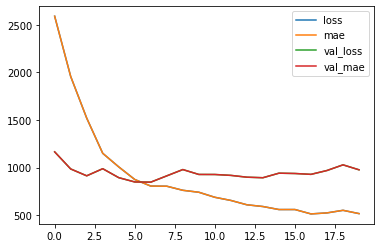

1/1 [==============================] - 0s 224ms/step - loss: 338.6330 - mae: 338.6330
[338.6329650878906, 338.6329650878906]
1/1 [==============================] - 0s 191ms/step
receta 0 kcal_true: 324.0 kcal_pred: 926.63684  precisión: 35.0 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 102.54854  precisión: 74.1 %
receta 0 protein_true: 8.0 protein_pred: 42.662468  precisión: 18.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 26.604969  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 571.8539  precisión: 76.2 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 63.30443  precisión: 65.9 %
receta 1 protein_true: 8.0 protein_pred: 26.444405  precisión: 30.3 %
receta 1 total_fat_true: 4.0 total_fat_pred: 16.474947  precisión: 24.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 6324.0474  precisión: 13.4 %
receta 2 carbohydrate_tru

100%|██████████| 100/100 [00:01<00:00, 88.97it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:30<00:00,  2.70s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_28 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

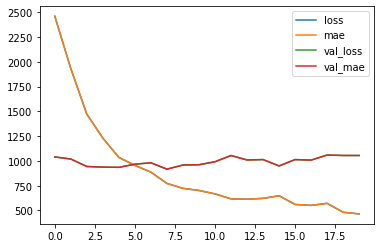

1/1 [==============================] - 0s 228ms/step - loss: 273.1489 - mae: 273.1489
[273.14892578125, 273.14892578125]
1/1 [==============================] - 0s 157ms/step
receta 0 kcal_true: 324.0 kcal_pred: 656.6523  precisión: 49.3 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 69.46374  precisión: 91.4 %
receta 0 protein_true: 8.0 protein_pred: 28.850378  precisión: 27.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 22.175373  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 413.98477  precisión: 95.0 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 43.764072  precisión: 45.6 %
receta 1 protein_true: 8.0 protein_pred: 18.394703  precisión: 43.5 %
receta 1 total_fat_true: 4.0 total_fat_pred: 13.930731  precisión: 28.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 5261.71  precisión: 16.1 %
receta 2 carbohydrate_true: 72.

100%|██████████| 100/100 [00:00<00:00, 108.86it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:36<00:00,  2.77s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_29 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

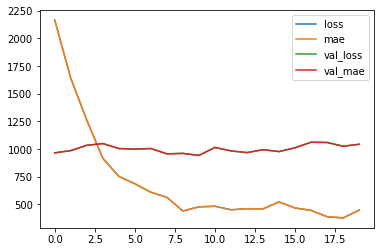

1/1 [==============================] - 0s 209ms/step - loss: 113.9836 - mae: 113.9836
[113.983642578125, 113.983642578125]
1/1 [==============================] - 0s 161ms/step
receta 0 kcal_true: 324.0 kcal_pred: 627.72174  precisión: 51.6 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 70.49484  precisión: 92.8 %
receta 0 protein_true: 8.0 protein_pred: 31.677788  precisión: 25.3 %
receta 0 total_fat_true: 0.0 total_fat_pred: 22.38677  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 294.25348  precisión: 67.5 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 33.143143  precisión: 34.5 %
receta 1 protein_true: 8.0 protein_pred: 15.447614  precisión: 51.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 10.304656  precisión: 38.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 1340.3816  precisión: 63.1 %
receta 2 carbohydrate_true:

100%|██████████| 100/100 [00:01<00:00, 84.06it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:46<00:00,  2.87s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_30 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

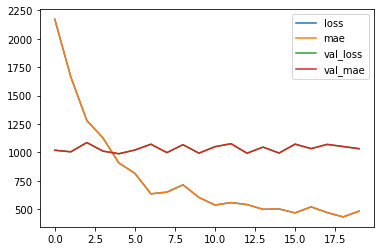

1/1 [==============================] - 0s 223ms/step - loss: 297.6069 - mae: 297.6069
[297.60687255859375, 297.60687255859375]
1/1 [==============================] - 0s 143ms/step
receta 0 kcal_true: 324.0 kcal_pred: 529.32306  precisión: 61.2 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 51.531902  precisión: 67.8 %
receta 0 protein_true: 8.0 protein_pred: 26.581123  precisión: 30.1 %
receta 0 total_fat_true: 0.0 total_fat_pred: 17.125887  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 207.58574  precisión: 47.6 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 20.581795  precisión: 21.4 %
receta 1 protein_true: 8.0 protein_pred: 11.024919  precisión: 72.6 %
receta 1 total_fat_true: 4.0 total_fat_pred: 6.7839923  precisión: 59.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 5426.8667  precisión: 15.6 %
receta 2 carbohydrate

100%|██████████| 100/100 [00:00<00:00, 111.95it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [05:18<00:00,  3.19s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_31 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

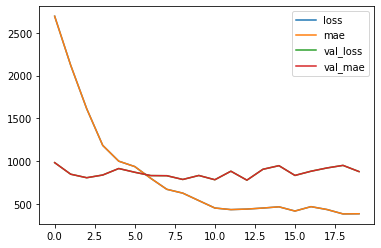

1/1 [==============================] - 0s 230ms/step - loss: 94.5384 - mae: 94.5384
[94.53843688964844, 94.53843688964844]
1/1 [==============================] - 0s 157ms/step
receta 0 kcal_true: 324.0 kcal_pred: 462.40253  precisión: 70.1 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 49.03675  precisión: 64.5 %
receta 0 protein_true: 8.0 protein_pred: 21.386368  precisión: 37.4 %
receta 0 total_fat_true: 0.0 total_fat_pred: 14.744669  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 191.13351  precisión: 43.8 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 20.95269  precisión: 21.8 %
receta 1 protein_true: 8.0 protein_pred: 9.260839  precisión: 86.4 %
receta 1 total_fat_true: 4.0 total_fat_pred: 6.548649  precisión: 61.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 1023.81006  precisión: 82.6 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:01<00:00, 86.14it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [04:25<00:00,  2.65s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_32 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

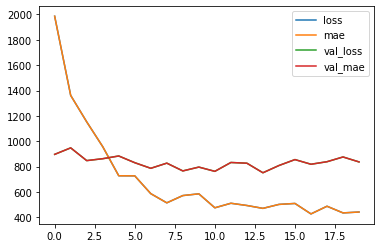

1/1 [==============================] - 0s 206ms/step - loss: 263.6762 - mae: 263.6762
[263.6762390136719, 263.6762390136719]
1/1 [==============================] - 0s 144ms/step
receta 0 kcal_true: 324.0 kcal_pred: 345.4014  precisión: 93.8 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 36.1336  precisión: 47.5 %
receta 0 protein_true: 8.0 protein_pred: 16.686844  precisión: 47.9 %
receta 0 total_fat_true: 0.0 total_fat_pred: 11.901097  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 125.84602  precisión: 28.9 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 13.882189  precisión: 14.5 %
receta 1 protein_true: 8.0 protein_pred: 6.899366  precisión: 86.2 %
receta 1 total_fat_true: 4.0 total_fat_pred: 4.3431597  precisión: 92.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 4582.615  precisión: 18.5 %
receta 2 carbohydrate_true: 

In [14]:
recomendador128.NUM_RECETAS = 100
recomendador128.EMB_SIZE = 128
ITER = 10
INITIAL_EPOCH = 0
EPOCHS = 20

Rangos_kcal = [
                (350, 1500),
                (300, 1000)           
              ]

Histories = []
for iteracion in range(ITER):
  MINU = 1 
  MAXU = 11  

  for ik in range(len(Rangos_kcal)):
    MINK, MAXK = Rangos_kcal[ik]
    print('\nITERACIÓN:', iteracion+1)
    print('min unidades:',MINU, ' max unidades:', MAXU)
    print('min kcal:', MINK, ' max kcal:', MAXK)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    modelo128, history = recomendador128.EntrenarModelo(df_nutricionales='nutricion_mejorado.csv',
                                  #df_training='recipes_con_info_nutricional.csv',
                                  df_test='recetas_test.csv', 
                                  df_val='recetas_val.csv',
                                  learning_rate=1e-4,
                                  version=version, 
                                  initial_epoch = INITIAL_EPOCH,                             
                                  epochs=INITIAL_EPOCH + EPOCHS, 
                                  kernels=128,                                             
                                  min_ingredientes=5, max_ingredientes=11,
                                  min_unidades=MINU, max_unidades=MAXU,  
                                  min_kcal=MINK, max_kcal= MAXK,                             
                                  save=True, verbose=True)
    INITIAL_EPOCH = history.epoch[-1]

    Histories.append(history)


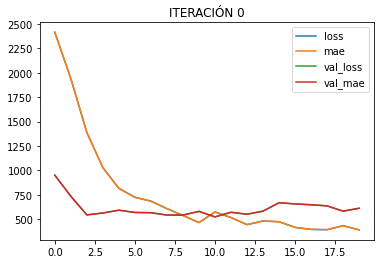

LOSS: 391.5760192871094  -- MAE: 391.5760192871094  -- VAL_LOSS: 613.1844482421875  -- VAL_MAE: 613.1844482421875
----------------------------------------------------------


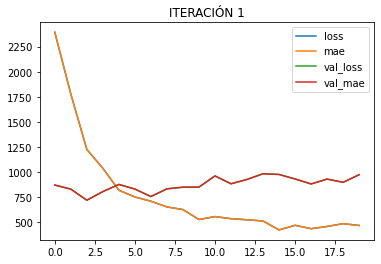

LOSS: 467.5821838378906  -- MAE: 467.5821838378906  -- VAL_LOSS: 973.5230102539062  -- VAL_MAE: 973.5230102539062
----------------------------------------------------------


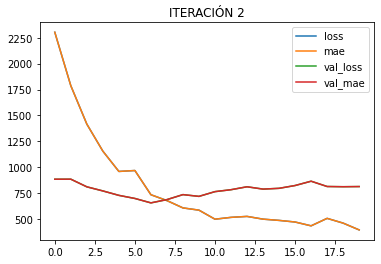

LOSS: 395.2918701171875  -- MAE: 395.2918701171875  -- VAL_LOSS: 813.7127075195312  -- VAL_MAE: 813.7127075195312
----------------------------------------------------------


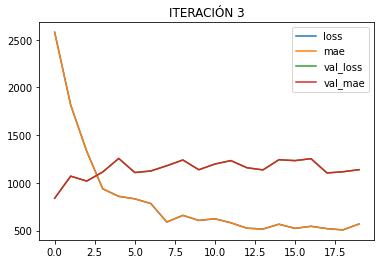

LOSS: 568.2876586914062  -- MAE: 568.2876586914062  -- VAL_LOSS: 1137.8096923828125  -- VAL_MAE: 1137.8096923828125
----------------------------------------------------------


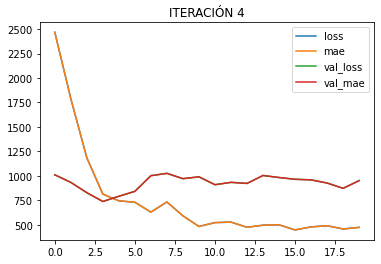

LOSS: 474.05938720703125  -- MAE: 474.05938720703125  -- VAL_LOSS: 951.605224609375  -- VAL_MAE: 951.605224609375
----------------------------------------------------------


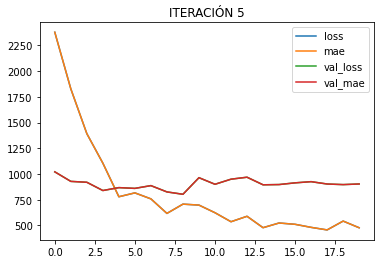

LOSS: 477.6342468261719  -- MAE: 477.6342468261719  -- VAL_LOSS: 902.9475708007812  -- VAL_MAE: 902.9475708007812
----------------------------------------------------------


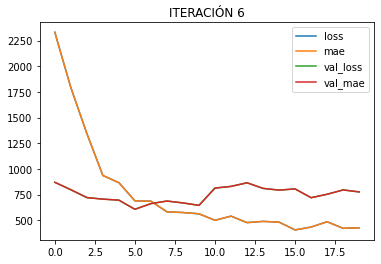

LOSS: 427.5655517578125  -- MAE: 427.5655517578125  -- VAL_LOSS: 776.3892822265625  -- VAL_MAE: 776.3892822265625
----------------------------------------------------------


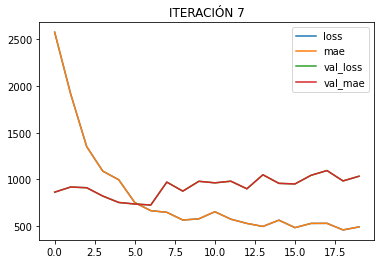

LOSS: 492.8562927246094  -- MAE: 492.8562927246094  -- VAL_LOSS: 1034.803955078125  -- VAL_MAE: 1034.803955078125
----------------------------------------------------------


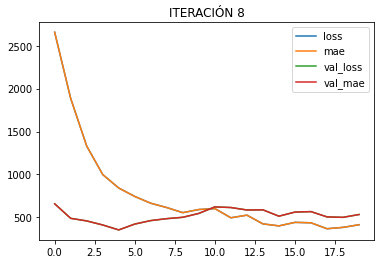

LOSS: 413.3565673828125  -- MAE: 413.3565673828125  -- VAL_LOSS: 532.5441284179688  -- VAL_MAE: 532.5441284179688
----------------------------------------------------------


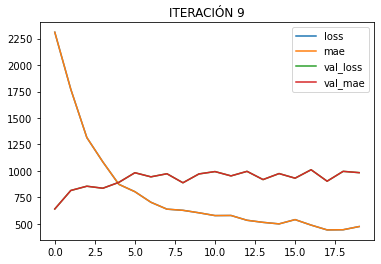

LOSS: 475.0125427246094  -- MAE: 475.0125427246094  -- VAL_LOSS: 983.8373413085938  -- VAL_MAE: 983.8373413085938
----------------------------------------------------------


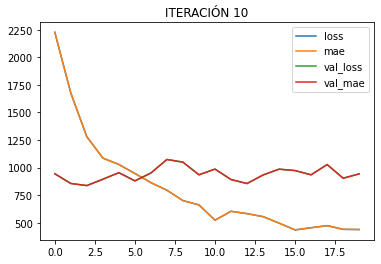

LOSS: 437.7299499511719  -- MAE: 437.7299499511719  -- VAL_LOSS: 942.6884765625  -- VAL_MAE: 942.6884765625
----------------------------------------------------------


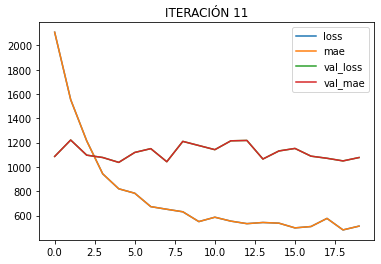

LOSS: 513.6341552734375  -- MAE: 513.6341552734375  -- VAL_LOSS: 1077.54541015625  -- VAL_MAE: 1077.54541015625
----------------------------------------------------------


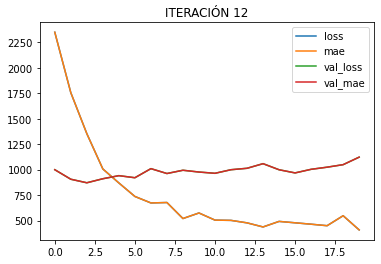

LOSS: 407.9278869628906  -- MAE: 407.9278869628906  -- VAL_LOSS: 1122.3526611328125  -- VAL_MAE: 1122.3526611328125
----------------------------------------------------------


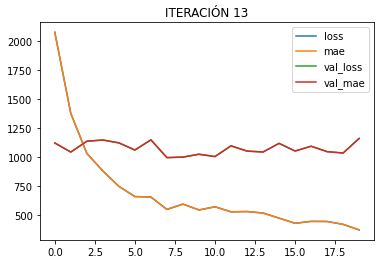

LOSS: 371.0047912597656  -- MAE: 371.0047912597656  -- VAL_LOSS: 1160.3037109375  -- VAL_MAE: 1160.3037109375
----------------------------------------------------------


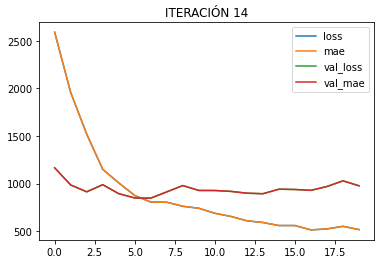

LOSS: 516.0552368164062  -- MAE: 516.0552368164062  -- VAL_LOSS: 976.2850341796875  -- VAL_MAE: 976.2850341796875
----------------------------------------------------------


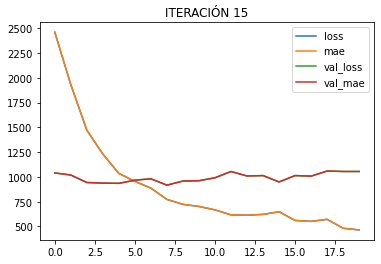

LOSS: 465.43145751953125  -- MAE: 465.43145751953125  -- VAL_LOSS: 1054.927978515625  -- VAL_MAE: 1054.927978515625
----------------------------------------------------------


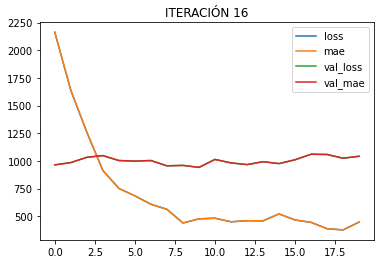

LOSS: 448.4035949707031  -- MAE: 448.4035949707031  -- VAL_LOSS: 1042.424560546875  -- VAL_MAE: 1042.424560546875
----------------------------------------------------------


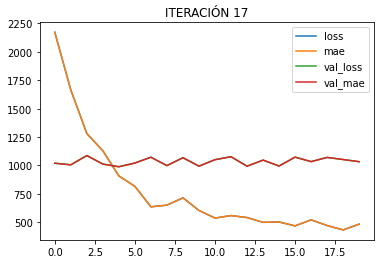

LOSS: 483.92718505859375  -- MAE: 483.92718505859375  -- VAL_LOSS: 1033.4996337890625  -- VAL_MAE: 1033.4996337890625
----------------------------------------------------------


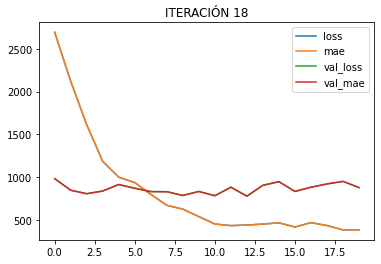

LOSS: 385.13116455078125  -- MAE: 385.13116455078125  -- VAL_LOSS: 878.1485595703125  -- VAL_MAE: 878.1485595703125
----------------------------------------------------------


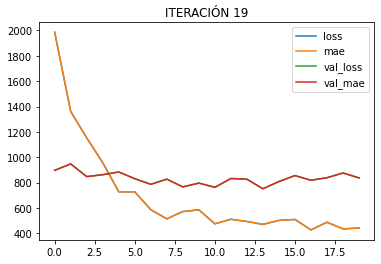

LOSS: 441.9423828125  -- MAE: 441.9423828125  -- VAL_LOSS: 837.08642578125  -- VAL_MAE: 837.08642578125
----------------------------------------------------------


In [15]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')

* Entrenar precios


ITERACIÓN: 1
Entrenando desde epoch 50
------------------------------------------

Generando 500  recetas aleatorias...



100%|██████████| 500/500 [00:00<00:00, 595.41it/s]


Calculando vector de características de 500 recetas...


100%|██████████| 500/500 [21:28<00:00,  2.58s/it]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_2 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

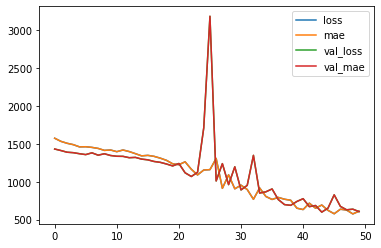

4/4 [==============================] - 1s 115ms/step - loss: 847.4523 - mae: 847.4523
[847.4522705078125, 847.4522705078125]
4/4 [==============================] - 0s 80ms/step
receta 0 precio_prom_por_gramo_true: 2.78 precio_prom_por_gramo_pred: 0.0  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 520.0 precio_prom_por_gramo_pred: 561.4423  precisión: 92.6 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 4.15 precio_prom_por_gramo_pred: 0.0  precisión: 0.0 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 92.25 precio_prom_por_gramo_pred: 87.853516  precisión: 95.2 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 357.5 precio_prom_por_gramo_pred: 383.07895  precisión: 93.3 %
------------------------------------

100%|██████████| 500/500 [00:00<00:00, 641.17it/s]


Calculando vector de características de 500 recetas...


100%|██████████| 500/500 [21:52<00:00,  2.62s/it]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_3 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

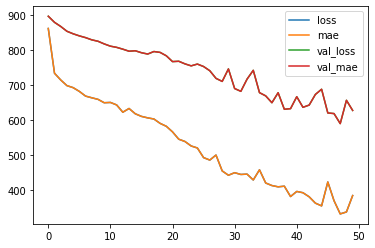

4/4 [==============================] - 1s 62ms/step - loss: 216.6416 - mae: 216.6416
[216.64161682128906, 216.64161682128906]
4/4 [==============================] - 0s 62ms/step
receta 0 precio_prom_por_gramo_true: 1361.0 precio_prom_por_gramo_pred: 1237.158  precisión: 90.9 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 1373.0 precio_prom_por_gramo_pred: 1550.5471  precisión: 88.5 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 113.1 precio_prom_por_gramo_pred: 112.99239  precisión: 99.9 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 296.2 precio_prom_por_gramo_pred: 348.843  precisión: 84.9 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 468.2 precio_prom_por_gramo_pred: 446.87906  precisión: 95.4 %
-------------------

In [8]:
recomendador128.NUM_RECETAS = 500
recomendador128.EMB_SIZE = 128
ITER = 2
INITIAL_EPOCH = 50
EPOCHS = 50


Histories_precios = []
for iteracion in range(ITER):
    print('\nITERACIÓN:', iteracion+1)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    modelo128_precios, history_precios = recomendador128.EntrenarModeloPrecios(
                                    df_precios='lista_precios_profeco_2022.csv',                                   
                                    learning_rate=1e-3,
                                    version=version, 
                                    initial_epoch = INITIAL_EPOCH,                             
                                    epochs=INITIAL_EPOCH + EPOCHS, 
                                    kernels=128,                                                                         
                                    save=True, verbose=True)
    INITIAL_EPOCH = history_precios.epoch[-1]

    Histories_precios.append(history_precios)

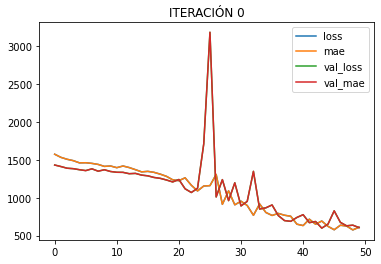

LOSS: 610.884521484375  -- MAE: 610.884521484375  -- VAL_LOSS: 605.876708984375  -- VAL_MAE: 605.876708984375
----------------------------------------------------------


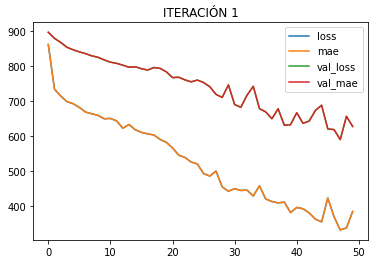

LOSS: 384.781494140625  -- MAE: 384.781494140625  -- VAL_LOSS: 627.9765014648438  -- VAL_MAE: 627.9765014648438
----------------------------------------------------------


In [10]:
for i in range(len(Histories_precios)):
    history = Histories_precios[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')